In [1]:
import cv2 as cv
import numpy as np
import os
import re
import src.lib.preprocessing_functions as pf
from src import data, visualization

from src.data import SatelliteImagesDataset, CropImage
import matplotlib.patches as patches
from torch.utils.data import DataLoader
import src.lib.helper_functions as hf
import time
import IPython

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [4]:
#data.save_imgs_2npy()


In [2]:
#images, _ = data.load_images_from_folder('data/images/dia_20')



In [2]:
images, time_stamps = [], []

images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_277', images, time_stamps, 10, "")
print(time_stamps)
print(last_img_filename)

[datetime.datetime(2020, 10, 3, 0, 0, 19), datetime.datetime(2020, 10, 3, 0, 10, 19), datetime.datetime(2020, 10, 3, 0, 20, 19), datetime.datetime(2020, 10, 3, 0, 30, 19), datetime.datetime(2020, 10, 3, 0, 40, 19), datetime.datetime(2020, 10, 3, 0, 50, 19), datetime.datetime(2020, 10, 3, 1, 0, 19), datetime.datetime(2020, 10, 3, 1, 10, 19), datetime.datetime(2020, 10, 3, 1, 20, 19), datetime.datetime(2020, 10, 3, 1, 30, 19), datetime.datetime(2020, 10, 3, 1, 40, 19)]
ART_2020277_014019.npy


In [15]:
images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_277', images, time_stamps, 10, last_img_filename)
print(time_stamps)
print(last_img_filename)



[datetime.datetime(2020, 10, 3, 2, 10, 19), datetime.datetime(2020, 10, 3, 2, 20, 19), datetime.datetime(2020, 10, 3, 2, 30, 19), datetime.datetime(2020, 10, 3, 2, 40, 19), datetime.datetime(2020, 10, 3, 2, 50, 19), datetime.datetime(2020, 10, 3, 3, 0, 19), datetime.datetime(2020, 10, 3, 3, 10, 19), datetime.datetime(2020, 10, 3, 3, 20, 19), datetime.datetime(2020, 10, 3, 3, 30, 19), datetime.datetime(2020, 10, 3, 3, 40, 19), datetime.datetime(2020, 10, 3, 3, 50, 19)]
ART_2020277_035019.npy


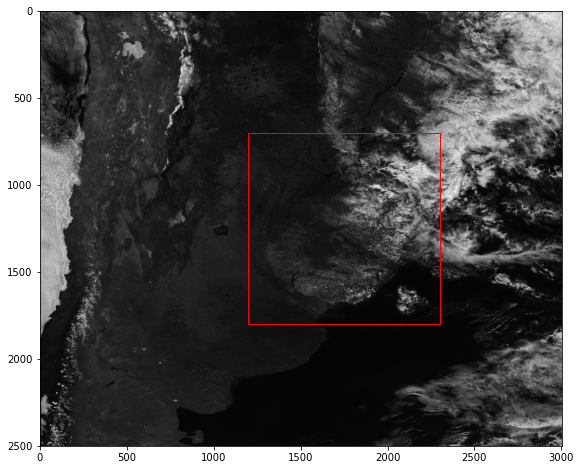

In [14]:
# Testing of class SatelliteImagesDataset

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305')

n = 90

sample = dataset[n]
image, time_stamp = sample['image'], sample['time_stamp']

fig, ax = plt.subplots()

rect = patches.Rectangle((1200, 700), 1100, 1100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.imshow(image, cmap='gray')
plt.show()


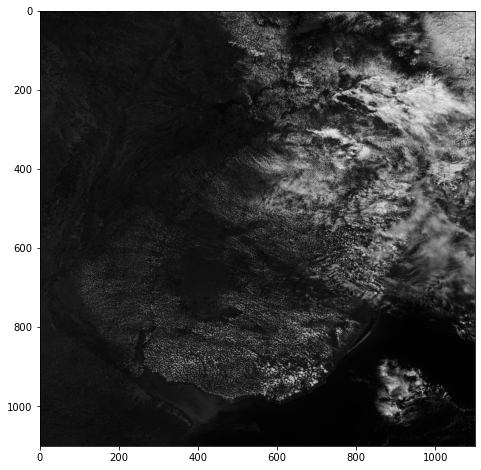

In [2]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305',
                                 transform = CropImage(vertices))

n = 90
# sample = dataset[n]
#image, time_stamp = sample['image'], sample['time_stamp']
image, time_stamp = dataset[n]
fig, ax = plt.subplots()


plt.imshow(image, cmap='gray')
plt.show()

In [5]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305',
                                 transform = CropImage(vertices))
n = 91
sample = dataset[n]
image, time_stamp = sample['image'], sample['time_stamp']

# print(time_stamp)
# datetime_str = hf.datetime2str(time_stamp)
# print(datetime_str)
# datetime_obj = hf.str2datetime(datetime_str)
# print(datetime_obj)


dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=False, num_workers=0)

for i_batch, sample in enumerate(dataloader):
    if i_batch==0:
       print(i_batch, sample['image'].shape, [hf.str2datetime(dt_str) for dt_str in sample['time_stamp']])

0 torch.Size([4, 1100, 1100]) [datetime.datetime(2020, 10, 31, 0, 0, 18), datetime.datetime(2020, 10, 31, 0, 10, 18), datetime.datetime(2020, 10, 31, 0, 20, 18), datetime.datetime(2020, 10, 31, 0, 30, 18)]


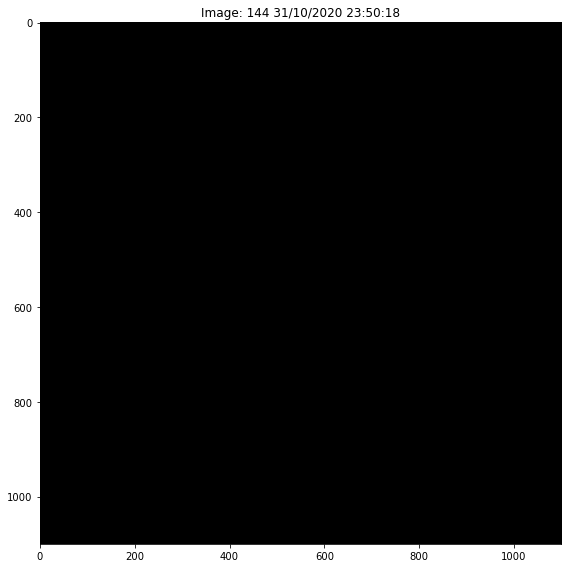

In [2]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305',
                                 transform = CropImage(vertices))

visualization.plot_day_images(dataset, sleep_secs=0, start=100)


